Ref:

https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

https://www.kaggle.com/code/sunaysawant/air-passengers-time-series-arima/notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

In [2]:
df_orig = pd.read_csv('data/AirPassengers.csv')
df_orig['Passengers'] = df_orig['Passengers'].astype(int)
df_orig['Month'] = pd.to_datetime(df_orig['Month'], infer_datetime_format=True)
df = df_orig.copy()
df = df.set_index(['Month'])

In [3]:
train_data = df[:int(len(df)*0.8)]
test_data = df[int(len(df)*0.8):]

#### AR

In [4]:
model = ARIMA(train_data, order=(12, 0, 0))
model_fit = model.fit()
model_fit.summary()

/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmod

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  115
Model:                ARIMA(12, 0, 0)   Log Likelihood                -493.965
Date:                Sun, 03 Jul 2022   AIC                           1015.929
Time:                        16:45:47   BIC                           1054.358
Sample:                    01-01-1949   HQIC                          1031.527
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.9559    316.610      0.758      0.449    -380.589     860.501
ar.L1          1.1908      0.126      9.434      0.000       0.943       1.438
ar.L2         -0.7226      0.170     -4.255      0.000      -1.055      -0.390
ar.L3          0.5910      0.153      3.870      0.000       0.292       0.890
ar.L4         -0.6213      0.133     -4.670      0.000      -0.882      -0.361
ar.L5          0.5794      0.155      3.731      0.000       0.275       0.884
ar.L6         -0.4380      0.166     -2.641      0.008      -0.763      -0.113
ar.L7          0.4244      0.170      2.491      0.013       0.090       0.758
ar.L8         -0.5911      0.190     -3.106      0.002      -0.964      -0.218
ar.L9          0.6221      0.172      3.607      0.000       0.284       0.960
ar.L10        -0.5901      0.140     -4.212      0.000      -0.865      -0.315
ar.L11         0.7621      0.155      4.921      0.000       0.459       1.066
ar.L12        -0.2087      0.136     -1.536      0.124      -0.475       0.058
sigma2       291.9696     51.341      5.687      0.000     191.343     392.596
===================================================================================
Ljung-Box (L1) (Q):                  18.39   Jarque-Bera (JB):                 2.63
Prob(Q):                              0.00   Prob(JB):                         0.27
Heteroskedasticity (H):               2.66   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0, 0.5, 'Passengers')

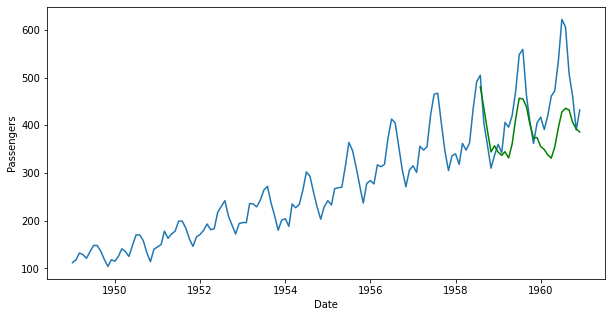

In [5]:
pred_test = model_fit.predict(start=len(train_data), end=(len(df)-1))
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(df)
plt.plot(pred_test, color='green')
plt.xlabel('Date')
plt.ylabel('Passengers')

In [6]:
# https://www.statsmodels.org/devel/generated/statsmodels.tsa.ar_model.AutoReg.html
model = AutoReg(train_data, lags=12, trend='c')
model_fit = model.fit()
model_fit.summary()

/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  115
Model:                    AutoReg(12)   Log Likelihood                -397.995
Method:               Conditional MLE   S.D. of innovations             11.532
Date:                Sun, 03 Jul 2022   AIC                            823.989
Time:                        16:45:48   BIC                            860.875
Sample:                    01-01-1950   HQIC                           838.929
                         - 07-01-1958                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.1025      3.758      2.422      0.015       1.736      16.469
Passengers.L1      0.5166      0.086      6.007      0.000       0.348       0.685
Passengers.L2     -0.2918      0.095     -3.068      0.002      -0.478      -0.105
Passengers.L3      0.2513      0.096      2.621      0.009       0.063       0.439
Passengers.L4     -0.2824      0.095     -2.969      0.003      -0.469      -0.096
Passengers.L5      0.2964      0.097      3.056      0.002       0.106       0.486
Passengers.L6     -0.2251      0.101     -2.220      0.026      -0.424      -0.026
Passengers.L7      0.1763      0.102      1.721      0.085      -0.025       0.377
Passengers.L8     -0.2751      0.101     -2.726      0.006      -0.473      -0.077
Passengers.L9      0.2697      0.102      2.641      0.008       0.070       0.470
Passengers.L10    -0.3026      0.102     -2.967      0.003      -0.502      -0.103
Passengers.L11     0.3588      0.103      3.477      0.001       0.157       0.561
Passengers.L12     0.5566      0.098      5.706      0.000       0.365       0.748
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9943           -0.0000j            0.9943           -0.0000
AR.2             0.8639           -0.4813j            0.9889           -0.0809
AR.3             0.8639           +0.4813j            0.9889            0.0809
AR.4             0.5033           -0.8583j            0.9949           -0.1656
AR.5             0.5033           +0.8583j            0.9949            0.1656
AR.6             0.0231           -1.0273j            1.0275           -0.2464
AR.7             0.0231           +1.0273j            1.0275            0.2464
AR.8            -0.5181           -0.8806j            1.0217           -0.3346
AR.9            -0.5181           +0.8806j            1.0217            0.3346
AR.10           -0.9182           -0.5018j            1.0463           -0.4204
AR.11           -0.9182           +0.5018j            1.0463            0.4204
AR.12           -1.5467           -0.0000j            1.5467           -0.5000
------------------------------------------------------------------------------
"""

/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Text(0, 0.5, 'Passengers')

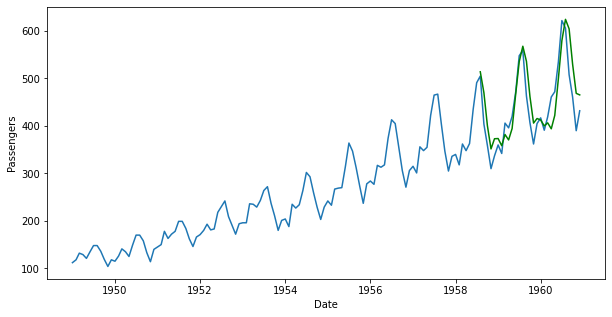

In [7]:
pred_test = model_fit.predict(start=len(train_data), end=(len(df)-1))
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(df)
plt.plot(pred_test, color='green')
plt.xlabel('Date')
plt.ylabel('Passengers')

#### MA

In [8]:
model = ARIMA(train_data, order=(0, 0, 1))
model_fit = model.fit()
model_fit.summary()

/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -613.458
Date:                Sun, 03 Jul 2022   AIC                           1232.917
Time:                        16:45:48   BIC                           1241.152
Sample:                    01-01-1949   HQIC                          1236.259
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        240.3969      9.764     24.621      0.000     221.260     259.534
ma.L1          0.9980      0.197      5.061      0.000       0.611       1.385
sigma2      2420.0185    624.564      3.875      0.000    1195.895    3644.142
===================================================================================
Ljung-Box (L1) (Q):                  64.41   Jarque-Bera (JB):                 5.56
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               1.64   Skew:                             0.51
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0, 0.5, 'Passengers')

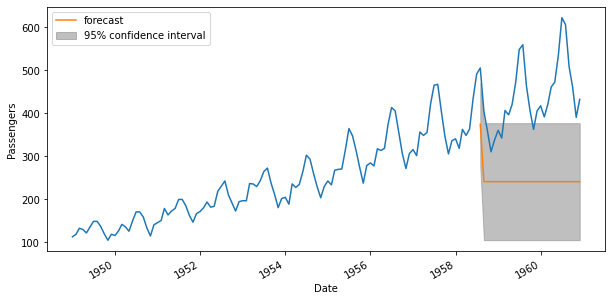

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(df)
plot_predict(model_fit, start=len(train_data), end=(len(df)-1), ax=axs)
plt.xlabel('Date')
plt.ylabel('Passengers')

#### ARMA

In [10]:
model = ARIMA(train_data, order=(12, 0, 1))
model_fit = model.fit()
model_fit.summary()

/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmod

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  115
Model:                ARIMA(12, 0, 1)   Log Likelihood                -493.608
Date:                Sun, 03 Jul 2022   AIC                           1017.216
Time:                        16:45:49   BIC                           1058.390
Sample:                    01-01-1949   HQIC                          1033.928
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.9542    133.820      1.793      0.073     -22.327     502.236
ar.L1          0.3169      0.297      1.067      0.286      -0.265       0.899
ar.L2          0.1843      0.312      0.591      0.554      -0.426       0.795
ar.L3         -0.0302      0.176     -0.172      0.864      -0.375       0.315
ar.L4         -0.1212      0.149     -0.811      0.417      -0.414       0.172
ar.L5          0.1137      0.153      0.746      0.456      -0.185       0.413
ar.L6          0.0417      0.160      0.260      0.795      -0.272       0.356
ar.L7         -0.0128      0.126     -0.101      0.919      -0.260       0.234
ar.L8         -0.1837      0.143     -1.288      0.198      -0.463       0.096
ar.L9          0.1146      0.180      0.635      0.525      -0.239       0.468
ar.L10        -0.0155      0.167     -0.093      0.926      -0.343       0.312
ar.L11         0.0593      0.115      0.515      0.607      -0.166       0.285
ar.L12         0.5293      0.128      4.129      0.000       0.278       0.780
ma.L1          0.7091      0.286      2.476      0.013       0.148       1.270
sigma2       285.3719     51.328      5.560      0.000     184.772     385.972
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                 2.61
Prob(Q):                              0.43   Prob(JB):                         0.27
Heteroskedasticity (H):               3.31   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0, 0.5, 'Passengers')

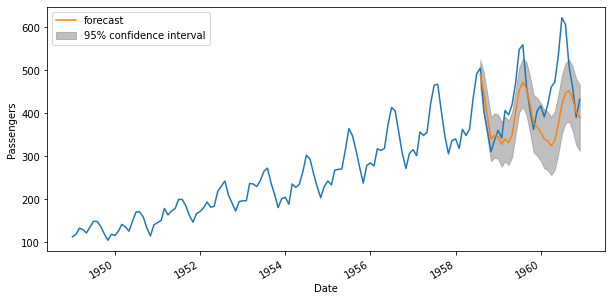

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(df)
plot_predict(model_fit, start=len(train_data), end=(len(df)-1), ax=axs)
plt.xlabel('Date')
plt.ylabel('Passengers')

#### ARIMA

In [12]:
model = ARIMA(train_data, order=(12, 1, 1))
model_fit = model.fit()
model_fit.summary()

/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/javier.fernandez/.local/lib/python3.8/site-packages/statsmod

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  115
Model:                ARIMA(12, 1, 1)   Log Likelihood                -424.153
Date:                Sun, 03 Jul 2022   AIC                            876.306
Time:                        16:45:49   BIC                            914.613
Sample:                    01-01-1949   HQIC                           891.853
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0904      0.088      1.023      0.306      -0.083       0.264
ar.L2         -0.0931      0.067     -1.382      0.167      -0.225       0.039
ar.L3          0.0494      0.057      0.865      0.387      -0.063       0.161
ar.L4         -0.0914      0.059     -1.540      0.123      -0.208       0.025
ar.L5          0.0613      0.062      0.983      0.326      -0.061       0.183
ar.L6         -0.0798      0.057     -1.411      0.158      -0.191       0.031
ar.L7          0.0122      0.068      0.179      0.858      -0.121       0.145
ar.L8         -0.1151      0.061     -1.891      0.059      -0.234       0.004
ar.L9          0.0412      0.068      0.602      0.547      -0.093       0.175
ar.L10        -0.1205      0.059     -2.057      0.040      -0.235      -0.006
ar.L11         0.0880      0.067      1.317      0.188      -0.043       0.219
ar.L12         0.8161      0.064     12.728      0.000       0.690       0.942
ma.L1         -0.2507      0.142     -1.760      0.078      -0.530       0.028
sigma2        82.5731     12.924      6.389      0.000      57.243     107.903
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 3.00
Prob(Q):                              0.72   Prob(JB):                         0.22
Heteroskedasticity (H):               1.86   Skew:                             0.40
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

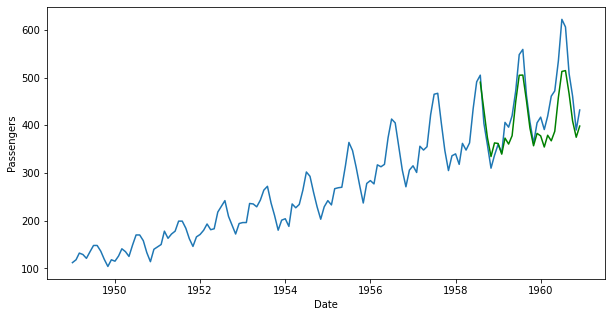

Text(0, 0.5, 'Passengers')

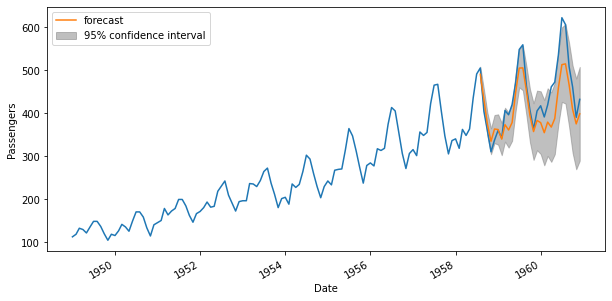

In [13]:
pred_test = model_fit.predict(start=len(train_data), end=(len(df)-1))
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(df)
plt.plot(pred_test, color='green')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(df)
plot_predict(model_fit, start=len(train_data), end=(len(df)-1), ax=axs)
plt.xlabel('Date')
plt.ylabel('Passengers')

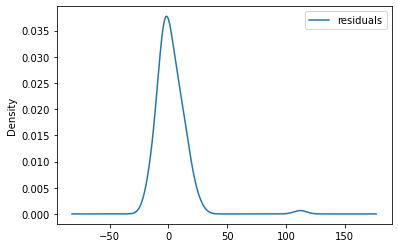

In [14]:
residuals = pd.DataFrame(model_fit.resid, columns=['residuals'])
residuals.plot(kind='kde')

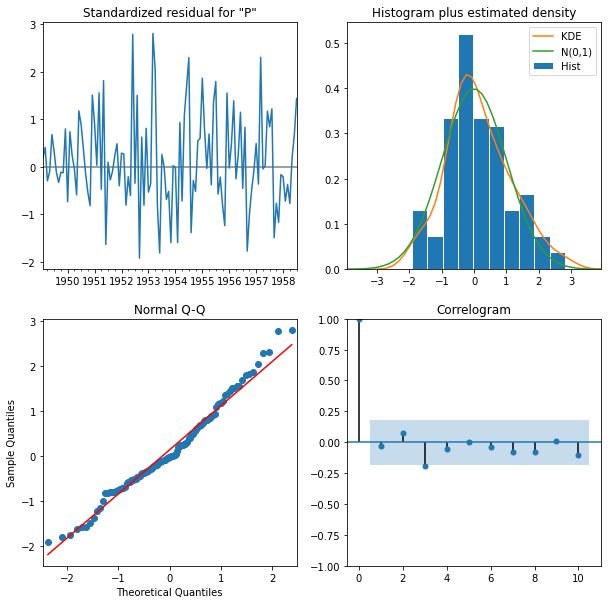

In [15]:
model_fit.plot_diagnostics(figsize=(10, 10))
plt.show()

In [16]:
print(ARIMA.__doc__)


    Autoregressive Integrated Moving Average (ARIMA) model, and extensions

    This model is the basic interface for ARIMA-type models, including those
    with exogenous regressors and those with seasonal components. The most
    general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
    all specialized cases, including

    - autoregressive models: AR(p)
    - moving average models: MA(q)
    - mixed autoregressive moving average models: ARMA(p, q)
    - integration models: ARIMA(p, d, q)
    - seasonal models: SARIMA(P, D, Q, s)
    - regression with errors that follow one of the above ARIMA-type models

    Parameters
    ----------
    endog : array_like, optional
        The observed time-series process :math:`y`.
    exog : array_like, optional
        Array of exogenous regressors.
    order : tuple, optional
        The (p,d,q) order of the model for the autoregressive, differences, and
        moving average components. d is always an integer, while p an